In [1]:
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib widget
%matplotlib inline

In [2]:
data = pd.read_csv("../Data Collection/final_data.csv", sep=',', lineterminator='\n')
data.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",NaN,False,1698,4,53,2016-10-15 21:32:11,4,False,False,13097,NaN,False,False,False
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,https://t.co/DJ4TYZgm7Q,False,823,852,5,2016-11-09 05:01:30,516,False,False,251,NaN,False,False,False
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",https://t.co/jIrurMaqEX,False,193,805,2,2017-06-17 05:34:27,4105,True,False,1201,NaN,False,False,False
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,NaN,False,569,659,2,2016-07-21 13:32:25,10086,True,False,1648,NaN,True,True,False
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",NaN,False,748235,118,1818,2012-01-15 16:32:35,152,True,True,4292,NaN,True,False,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36590 entries, 0 to 36589
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36590 non-null  int64  
 1   is_bot                        36590 non-null  int64  
 2   id                            36590 non-null  int64  
 3   screen_name                   36590 non-null  object 
 4   location                      23826 non-null  object 
 5   description                   29471 non-null  object 
 6   url                           15065 non-null  object 
 7   protected                     36590 non-null  bool   
 8   followers_count               36590 non-null  int64  
 9   friends_count                 36590 non-null  int64  
 10  listed_count                  36590 non-null  int64  
 11  created_at                    36590 non-null  object 
 12  favourites_count              36590 non-null  int64  
 13  g

In [4]:
data.describe(include='all')

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image
count,36590.000000,36590.000000,3.659000e+04,36590,23826,29471,15065,36590,3.659000e+04,3.659000e+04,3.659000e+04,36590,36590.000000,36590,36590,3.659000e+04,0.0,36590,36590,36590
unique,NaN,NaN,NaN,36590,11719,29217,14984,2,NaN,NaN,NaN,36582,NaN,2,2,NaN,NaN,2,2,2
top,NaN,NaN,NaN,best_in_dumbest,"Los Angeles, CA",.,https://t.co/ScNVY5d91C,False,NaN,NaN,NaN,2015-11-03 09:51:18,NaN,False,False,NaN,NaN,True,False,False
freq,NaN,NaN,NaN,1,507,18,15,35156,NaN,NaN,NaN,2,NaN,19739,29171,NaN,NaN,30917,21276,36042
mean,18294.500000,0.357967,1.209874e+17,NaN,NaN,NaN,NaN,NaN,3.836379e+05,4.297925e+03,9.329094e+02,NaN,13722.288904,NaN,NaN,2.199612e+04,NaN,NaN,NaN,NaN
std,10562.767511,0.479409,2.991924e+17,NaN,NaN,NaN,NaN,NaN,2.535999e+06,4.849551e+04,1.718303e+04,NaN,38121.756078,NaN,NaN,7.050774e+04,NaN,NaN,NaN,NaN
min,0.000000,0.000000,4.180000e+02,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,9147.250000,0.000000,9.762581e+07,NaN,NaN,NaN,NaN,NaN,3.500000e+01,3.600000e+01,0.000000e+00,NaN,373.250000,NaN,NaN,1.360000e+03,NaN,NaN,NaN,NaN
50%,18294.500000,0.000000,3.937624e+08,NaN,NaN,NaN,NaN,NaN,3.700000e+02,2.990000e+02,4.000000e+00,NaN,2115.000000,NaN,NaN,4.368000e+03,NaN,NaN,NaN,NaN
75%,27441.750000,1.000000,2.438237e+09,NaN,NaN,NaN,NaN,NaN,9.237000e+03,9.140000e+02,1.210000e+02,NaN,9940.000000,NaN,NaN,1.782375e+04,NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()

Unnamed: 0                          0
is_bot                              0
id                                  0
screen_name                         0
location                        12764
description                      7119
url                             21525
protected                           0
followers_count                     0
friends_count                       0
listed_count                        0
created_at                          0
favourites_count                    0
geo_enabled                         0
verified                            0
statuses_count                      0
lang                            36590
profile_use_background_image        0
default_profile                     0
default_profile_image               0
dtype: int64

In [6]:
# convert boolean data to integers

data["protected"] = data["protected"].astype(int)
data["geo_enabled"] = data["geo_enabled"].astype(int)
data["verified"] = data["verified"].astype(int)
data["profile_use_background_image"] = data["profile_use_background_image"].astype(int)
data["default_profile"] = data["default_profile"].astype(int)
data["default_profile_image"] = data["default_profile_image"].astype(int)

for i in data.index:
  if data["url"][i] is None:
    data["url"][i] = 0
  else:
    data["url"][i] = 1


data.head()

C:\Users\oluwanifemi.aweda\AppData\Local\Temp\ipykernel_9916\1033242537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["url"][i] = 1


,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0


In [7]:
data.shape

(36590, 20)

In [8]:
# create a new feature to see how many days the account has been in use

today = datetime.datetime.now()
today = pd.to_datetime(today)

In [9]:
for i in data.index:
     data['created_at'][i] = pd.to_datetime(data['created_at'][i])

type(data['created_at'][0])

C:\Users\oluwanifemi.aweda\AppData\Local\Temp\ipykernel_9916\3504966662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['created_at'][i] = pd.to_datetime(data['created_at'][i])


pandas._libs.tslibs.timestamps.Timestamp

In [10]:
account_age = []
for i in data.index:
    account_age.append((today - data['created_at'][i]).days)

data['account_age'] = account_age

In [11]:
result = data.select_dtypes(include='number')
result.columns

Index(['Unnamed: 0', 'is_bot', 'id', 'protected', 'followers_count',
       'friends_count', 'listed_count', 'favourites_count', 'geo_enabled',
       'verified', 'statuses_count', 'lang', 'profile_use_background_image',
       'default_profile', 'default_profile_image', 'account_age'],
      dtype='object')

In [12]:
plt.rcParams["figure.figsize"] = (15,8)
def plot_distribution(feature_to_use):
    sns.distplot(data[feature_to_use], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

    # minimun = data[feature_to_use].min()
    # maximum = data[feature_to_use].max()

    # plt.xlim(0, maximum)

    # plt.hist(data[feature_to_use], color = 'blue', edgecolor = 'black',
    #      bins = int(180/5))
     

numeric_columns = ['followers_count',
       'friends_count', 'listed_count', 'favourites_count',
       'statuses_count', 'lang', 'account_age',
       'avg_daily_followers', 'avg_daily_friends', 'avg_daily_favorites',
       'friends_log', 'followers_log', 'favs_log']

widgets.interact(plot_distribution, feature_to_use=numeric_columns);

interactive(children=(Dropdown(description='feature_to_use', options=('followers_count', 'friends_count', 'lis…

Looking at the distribution of the values for the plots above, we see that the values are skewed.
I will set up some transformation parameters to try and correct the skewed features.

In [13]:
data['average_tweets_per_day'] = np.round(data['statuses_count'] / data['account_age'], 3)
data['hour_created'] = pd.to_datetime(data['created_at']).dt.hour

# Interesting features to look at: 
data['avg_daily_followers'] = np.round(data['followers_count'] / data['account_age'])
data['avg_daily_friends'] = np.round(data['followers_count'] / data['account_age'])
data['avg_daily_favorites'] = np.round(data['followers_count'] / data['account_age'])

# Log transformations for highly skewed data
data['friends_log'] = np.round(np.log(1 + data['friends_count']), 3)
data['followers_log'] = np.round(np.log(1 + data['followers_count']), 3)
data['favs_log'] = np.round(np.log(1 + data['favourites_count']), 3)
data['avg_daily_tweets_log'] = np.round(np.log(1+ data['average_tweets_per_day']), 3)

# Possible interaction features
data['network'] = np.round(data['friends_log'] * data['followers_log'], 3)
data['tweet_to_followers'] = np.round(np.log( 1+ data['statuses_count']) * np.log(1+ data['followers_count']), 3)

# Log-transformed daily acquisition metrics for dist. plots
data['follower_acq_rate'] = np.round(np.log(1 + (data['followers_count'] / data['account_age'])), 3)
data['friends_acq_rate'] = np.round(np.log(1 + (data['friends_count'] / data['account_age'])), 3)
data['favs_rate'] = np.round(np.log(1 + (data['friends_count'] / data['account_age'])), 3)

In [14]:
data.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,...,avg_daily_favorites,friends_log,followers_log,favs_log,avg_daily_tweets_log,network,tweet_to_followers,follower_acq_rate,friends_acq_rate,favs_rate
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,...,1.0,1.609,7.438,1.609,1.945,11.968,70.512,0.575,0.002,0.002
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,...,0.0,6.749,6.714,6.248,0.110,45.313,37.126,0.323,0.332,0.332
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,...,0.0,6.692,5.268,8.320,0.481,35.253,37.358,0.095,0.347,0.347
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,...,0.0,6.492,6.346,9.219,0.545,41.198,47.008,0.223,0.255,0.255
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,...,191.0,4.779,13.525,5.030,0.740,64.636,113.137,5.257,0.030,0.030


In [15]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,...,avg_daily_favorites,friends_log,followers_log,favs_log,avg_daily_tweets_log,network,tweet_to_followers,follower_acq_rate,friends_acq_rate,favs_rate
0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,...,1.0,1.609,7.438,1.609,1.945,11.968,70.512,0.575,0.002,0.002
1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,...,0.0,6.749,6.714,6.248,0.110,45.313,37.126,0.323,0.332,0.332
2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,...,0.0,6.692,5.268,8.320,0.481,35.253,37.358,0.095,0.347,0.347
3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,...,0.0,6.492,6.346,9.219,0.545,41.198,47.008,0.223,0.255,0.255
4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,...,191.0,4.779,13.525,5.030,0.740,64.636,113.137,5.257,0.030,0.030


In [16]:
data.dtypes

is_bot                            int64
id                                int64
screen_name                      object
location                         object
description                      object
url                              object
protected                         int32
followers_count                   int64
friends_count                     int64
listed_count                      int64
created_at                       object
favourites_count                  int64
geo_enabled                       int32
verified                          int32
statuses_count                    int64
lang                            float64
profile_use_background_image      int32
default_profile                   int32
default_profile_image             int32
account_age                       int64
average_tweets_per_day          float64
hour_created                      int64
avg_daily_followers             float64
avg_daily_friends               float64
avg_daily_favorites             float64


In [17]:
data.columns

Index(['is_bot', 'id', 'screen_name', 'location', 'description', 'url',
       'protected', 'followers_count', 'friends_count', 'listed_count',
       'created_at', 'favourites_count', 'geo_enabled', 'verified',
       'statuses_count', 'lang', 'profile_use_background_image',
       'default_profile', 'default_profile_image', 'account_age',
       'average_tweets_per_day', 'hour_created', 'avg_daily_followers',
       'avg_daily_friends', 'avg_daily_favorites', 'friends_log',
       'followers_log', 'favs_log', 'avg_daily_tweets_log', 'network',
       'tweet_to_followers', 'follower_acq_rate', 'friends_acq_rate',
       'favs_rate'],
      dtype='object')

Text(0.5, 1.0, 'Correlation of potential features: bots only')

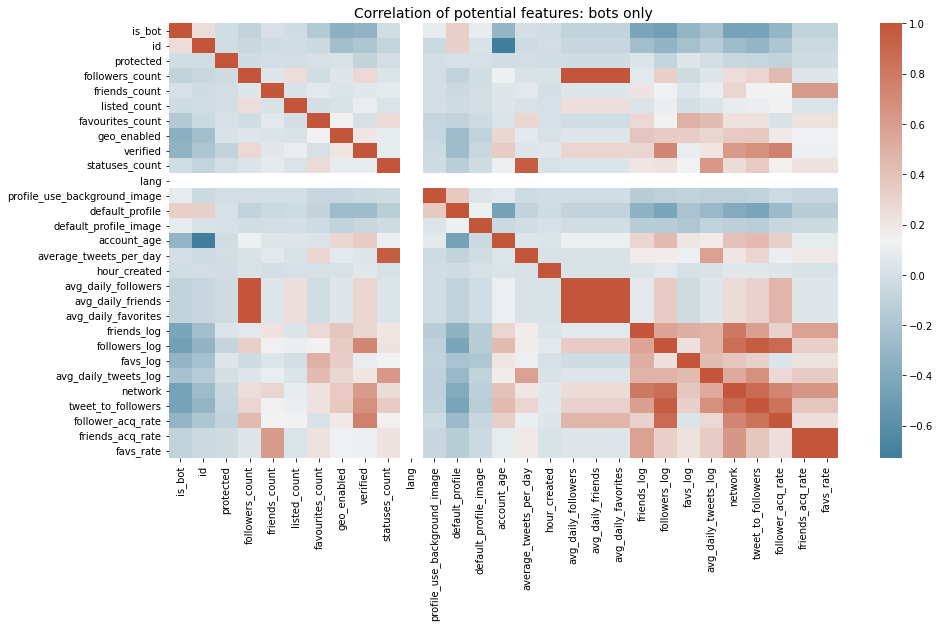

In [18]:
# See correlations

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: bots only', fontsize=14)

Text(0.5, 1.0, 'Correlation of potential features: bots only')

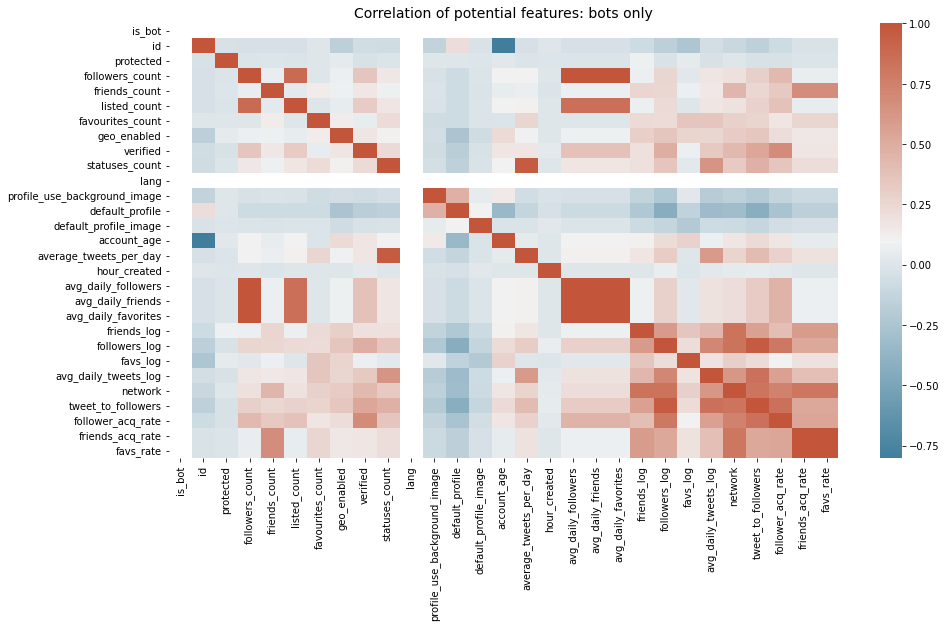

In [19]:
bots = data[data['is_bot'] == 1]
humans = data[data['is_bot'] == 0]


cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(bots.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: bots only', fontsize=14)

Text(0.5, 1.0, 'Correlation of potential features: humans only')

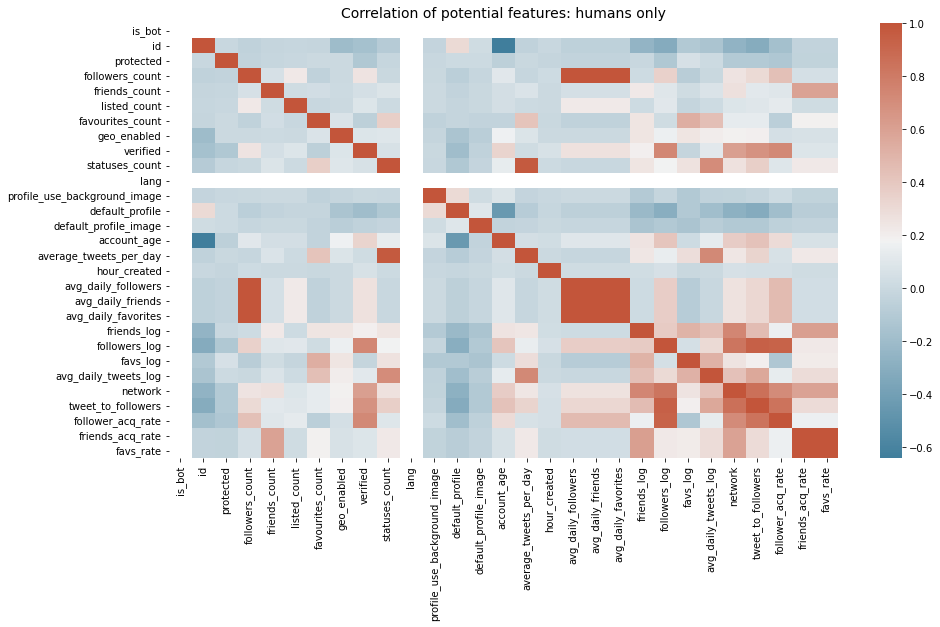

In [20]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(humans.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: humans only', fontsize=14)

In [21]:
data.select_dtypes(include=np.number).columns.tolist()

['is_bot',
 'id',
 'protected',
 'followers_count',
 'friends_count',
 'listed_count',
 'favourites_count',
 'geo_enabled',
 'verified',
 'statuses_count',
 'lang',
 'profile_use_background_image',
 'default_profile',
 'default_profile_image',
 'account_age',
 'average_tweets_per_day',
 'hour_created',
 'avg_daily_followers',
 'avg_daily_friends',
 'avg_daily_favorites',
 'friends_log',
 'followers_log',
 'favs_log',
 'avg_daily_tweets_log',
 'network',
 'tweet_to_followers',
 'follower_acq_rate',
 'friends_acq_rate',
 'favs_rate']

In [22]:
# check the distribution of the values again


def plot_distribution(feature_to_use):
    plt.figure(figsize=(7,5), dpi=100)
    sns.histplot(x=data[feature_to_use], data=data, hue='is_bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

    plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
    plt.title('Distribution graph', fontsize=12)
    plt.ylabel('Density', fontsize=10)
    plt.xlim(0, 18)
    plt.ylim(0, 0.11)
    sns.despine();
     

numeric_columns = ['followers_log', 'friends_log', 'network', 'favs_log', 'avg_daily_tweets_log',
'follower_acq_rate', 'friends_acq_rate', 'tweet_to_followers', 'hour_created']

widgets.interact(plot_distribution, feature_to_use=numeric_columns);

interactive(children=(Dropdown(description='feature_to_use', options=('followers_log', 'friends_log', 'network…

<AxesSubplot:xlabel='is_bot'>

<Figure size 864x720 with 0 Axes>

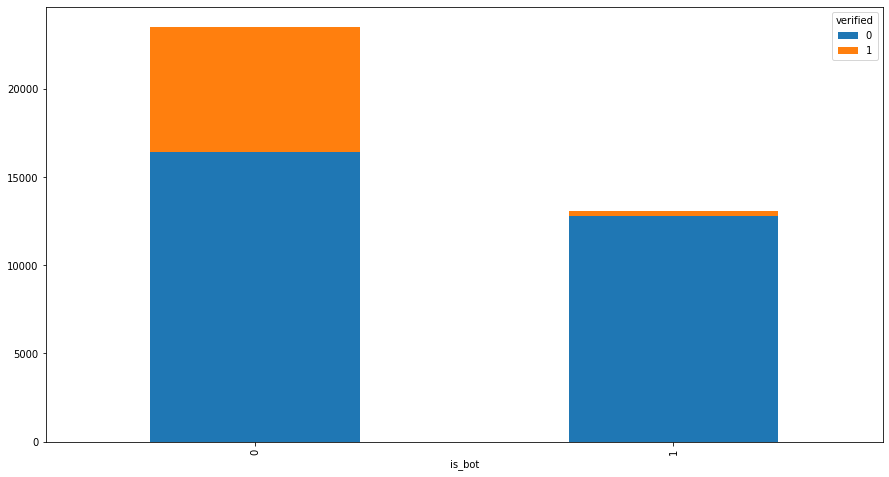

In [23]:
target_col: str = "verified"
plt.figure(figsize=(12, 10))
data.groupby(['is_bot', target_col])['is_bot'].count().unstack(target_col).plot(kind='bar', stacked=True)

In [24]:
df = data[['is_bot', 'screen_name', 'created_at', 'hour_created', 'verified', 'geo_enabled', 'lang', 'default_profile', 'default_profile_image', 'favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day', 'account_age', 'avg_daily_followers', 'avg_daily_friends', 'avg_daily_favorites', 'friends_log', 'followers_log', 'favs_log', 'avg_daily_tweets_log', 'network', 'tweet_to_followers', 'follower_acq_rate', 'friends_acq_rate', 'favs_rate']]

df.head()        

,is_bot,screen_name,created_at,hour_created,verified,geo_enabled,lang,default_profile,default_profile_image,favourites_count,...,avg_daily_favorites,friends_log,followers_log,favs_log,avg_daily_tweets_log,network,tweet_to_followers,follower_acq_rate,friends_acq_rate,favs_rate
0,1,best_in_dumbest,2016-10-15 21:32:11,21,0,0,NaN,0,0,4,...,1.0,1.609,7.438,1.609,1.945,11.968,70.512,0.575,0.002,0.002
1,0,CJRubinPhoto,2016-11-09 05:01:30,5,0,0,NaN,0,0,516,...,0.0,6.749,6.714,6.248,0.110,45.313,37.126,0.323,0.332,0.332
2,1,SVGEGENT,2017-06-17 05:34:27,5,0,1,NaN,0,0,4105,...,0.0,6.692,5.268,8.320,0.481,35.253,37.358,0.095,0.347,0.347
3,1,TinkerVHELPK5,2016-07-21 13:32:25,13,0,1,NaN,1,0,10086,...,0.0,6.492,6.346,9.219,0.545,41.198,47.008,0.223,0.255,0.255
4,0,JoleonLescott,2012-01-15 16:32:35,16,1,1,NaN,0,0,152,...,191.0,4.779,13.525,5.030,0.740,64.636,113.137,5.257,0.030,0.030


In [25]:
data.to_csv('analyzed1.csv', index=False)